In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time
import random
import seaborn as sns
from glob import glob
import os

# Fractality and avg_path_length/diam:

In [2]:
def data_import_metrics(file):
    dataframe= pd.read_excel(file)
    dataframe = dataframe.drop(dataframe.columns[0], axis=1)
    
    return dataframe

In [3]:
rbfm_avg = data_import_metrics("to_plot/RBFM_avg.xlsx")
mixture_avg = data_import_metrics("to_plot/Mixture_avg.xlsx")

In [4]:
shm_avg = data_import_metrics("to_plot/SHM_avg.xlsx")
uvflower_avg = data_import_metrics("to_plot/uvflower_avg.xlsx")

## Mixture:

In [31]:
mixture_avg['avgpath_size'] = mixture_avg['avg_path_length']/mixture_avg['V']
mixture_avg['avgpath_logsize'] = mixture_avg['avg_path_length']/np.log(mixture_avg['V'])

In [39]:
mixture_avg_smallp = mixture_avg[mixture_avg['param3']<=0.05]

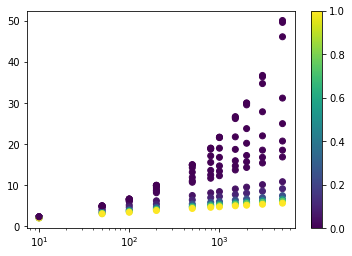

In [32]:
plt.scatter(mixture_avg['V'],mixture_avg['avg_path_length'],c=mixture_avg['param3'])
plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

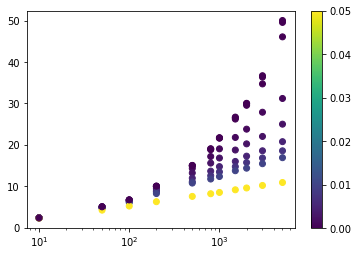

In [40]:
plt.scatter(mixture_avg_smallp['V'],mixture_avg_smallp['avg_path_length'],c=mixture_avg_smallp['param3'])
plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

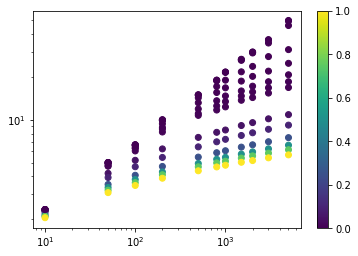

In [33]:
plt.scatter(mixture_avg['V'],mixture_avg['avg_path_length'],c=mixture_avg['param3'])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

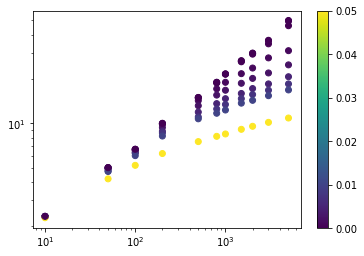

In [41]:
plt.scatter(mixture_avg_smallp['V'],mixture_avg_smallp['avg_path_length'],c=mixture_avg_smallp['param3'])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

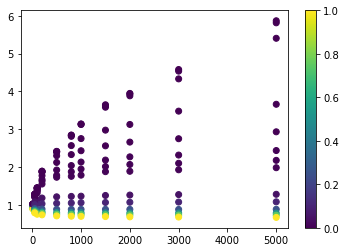

In [34]:
plt.scatter(mixture_avg['V'],mixture_avg['avgpath_logsize'], c=mixture_avg['param3'], marker="o", label='mixture')
#plt.xlim(200,6000)
#plt.ylim(0,3)
plt.colorbar()

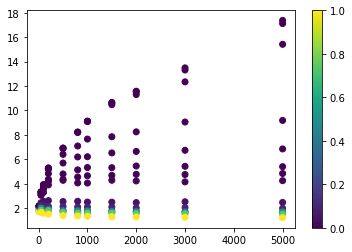

In [42]:
plt.scatter(mixture_avg['V'],mixture_avg['diam_logsize'], c=mixture_avg['param3'], marker="o", label='mixture')
#plt.xlim(200,6000)
#plt.ylim(1,5)
plt.colorbar()

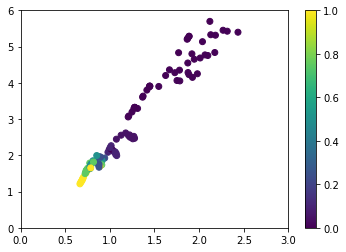

In [43]:
plt.scatter(mixture_avg['avgpath_logsize'],mixture_avg['diam_logsize'], c=mixture_avg['param3'])
plt.xlim(0,3)
plt.ylim(0,6)
plt.colorbar()

### Innentől már neked nem lényeges.
De egyszer még lehet jól jön, ha megvan neked is:D

#### A notebook legvégén nem csak a mixture modellre vannak ezek az ábrák, hanem a másik 3 modellre is. Szerintem ezen az avgpath/diam vonalon a mixture a leglényegesebb, de ha gondolod a többit is megnézheted.

Gondolom egyértelmű, de ha használod ne felejtsd el a file-ok elérési útját megnézni, mert itt a sajátjaim vannak :D

---

---

---

## Generating data for stability analysis (RBFM & Mixture)

* Reading model parameters from excel files
* stability_multi contains the functions for multiprocessing
* main func -- graphmetrics_stability generates 30 graphs with the same param settings and calculates their metric values <br> output: excel file of the metric values in the specified folder

In [13]:
import stability_multi
import generators
import igraph as ig
import networkx as nx
import model_metric_generator

In [14]:
from multiprocessing import Process

In [5]:
params = pd.read_excel("rbfm_stability_params.xlsx")

In [8]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for index, row in params.iterrows():
        p = Process(target=stability_multi.graphmetrics_stability, args=(list(row), 30, generators.repulsion_based_fractal_model, "rbfm"))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
       
    print('That took {} seconds'.format(time.time() - starttime))

That took 308.747111082077 seconds


In [24]:
params = pd.read_excel("mixture_stability_params.xlsx")
params2 = pd.read_excel("mixture_stability_params2.xlsx")
params3 = pd.read_excel("mixture_stability_params3.xlsx")

In [25]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for index, row in params3.iterrows():
        p = Process(target=stability_multi.graphmetrics_stability, args=(list(row), 30, generators.mixture_model_2d, "mixture"))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
       
    print('That took {} seconds'.format(time.time() - starttime))

That took 109.36906409263611 seconds


In [4]:
params = pd.read_excel("shm_params.xlsx")

In [6]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for index, row in params.iterrows():
        p = Process(target=model_metric_generator.graphmetrics_generator, args=(list(row), 30, generators.fractal_model, "shm"))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
       
    print('That took {} seconds'.format(time.time() - starttime))

That took 284.5990722179413 seconds


In [15]:
params = pd.read_excel("uv_flower_params.xlsx")

In [16]:
if __name__ == '__main__':
    starttime = time.time()
    processes = []
    for index, row in params.iterrows():
        p = Process(target=model_metric_generator.graphmetrics_generator, args=(list(row), 30, generators.uv_flower, "uvflower"))
        processes.append(p)
        p.start()
        
    for process in processes:
        process.join()
       
    print('That took {} seconds'.format(time.time() - starttime))

That took 234.6682436466217 seconds


## Data import of metrics by model params:
* Creating a list for a model, containing (name, df) tuples.
* name: parameter setting
* df: metrics, calculated for 30 graphs generated by the param setting

In [17]:
def data_import(directory):
    paths=glob(os.path.join(directory,'*'))
    file_names=os.listdir(directory)
    list_of_dfs = []
    
    if file_names[0] == ".ipynb_checkpoints":
        file_names.pop(0)
        
    for index,file in enumerate(paths):
        dataframe= pd.read_excel(file)
        dataframe = dataframe.drop(dataframe.columns[0], axis=1)
        
        list_of_dfs.append((file_names[index], dataframe))
  
    return list_of_dfs

In [26]:
rbfm = data_import("rbfm_stability")
mixture = data_import("mixture_stability")

## Figures (stability of the models)

In [18]:
shm = data_import("shm_metrics")
uvflower = data_import("uvflower_metrics")

In [27]:
len(rbfm), len(mixture), len(shm), len(uvflower)

(69, 154, 138, 117)

In [61]:
rbfm_1 = rbfm[:25]
rbfm_2 = rbfm[25:50]
rbfm_3 = rbfm[50:]

mixture_1 = mixture[:25]
mixture_2 = mixture[25:50]
mixture_3 = mixture[50:]

### RBFM

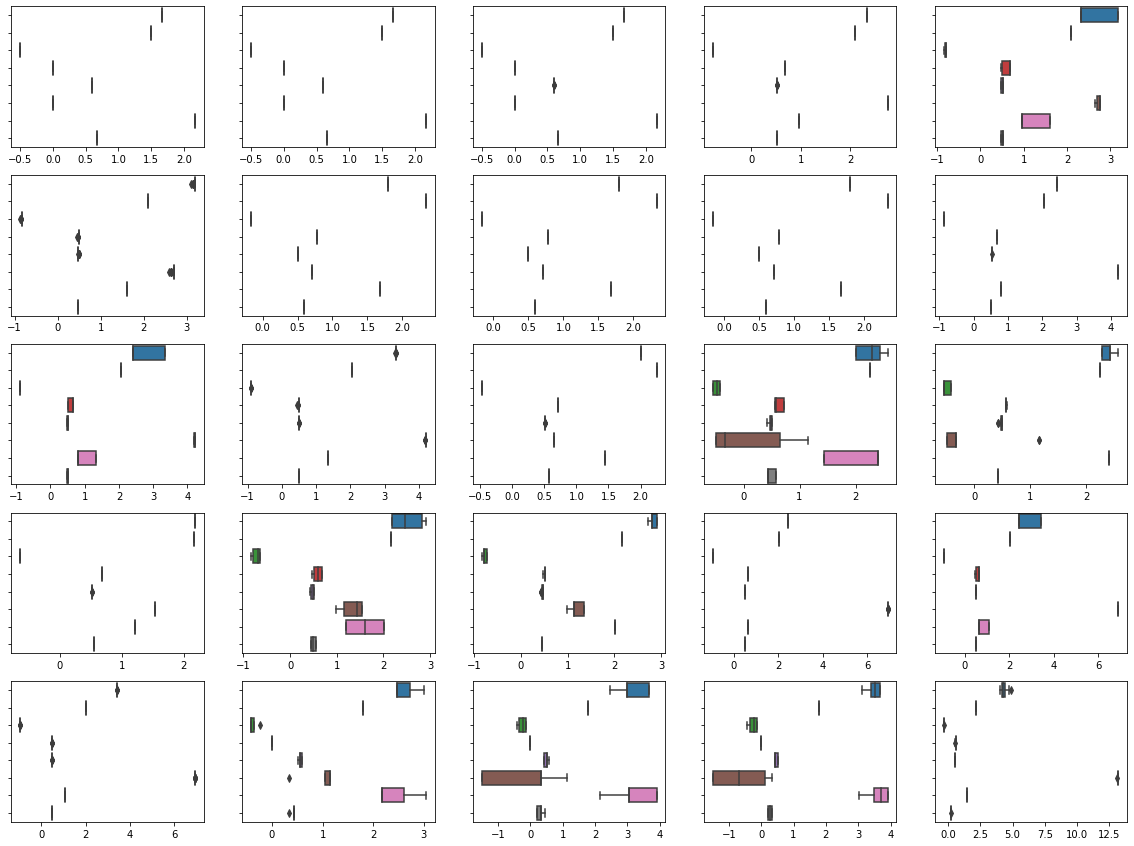

In [80]:
plt.figure(figsize=(20, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    fig=sns.boxplot(data=rbfm_1[i][1], orient="h")
    fig.set(yticklabels=[])

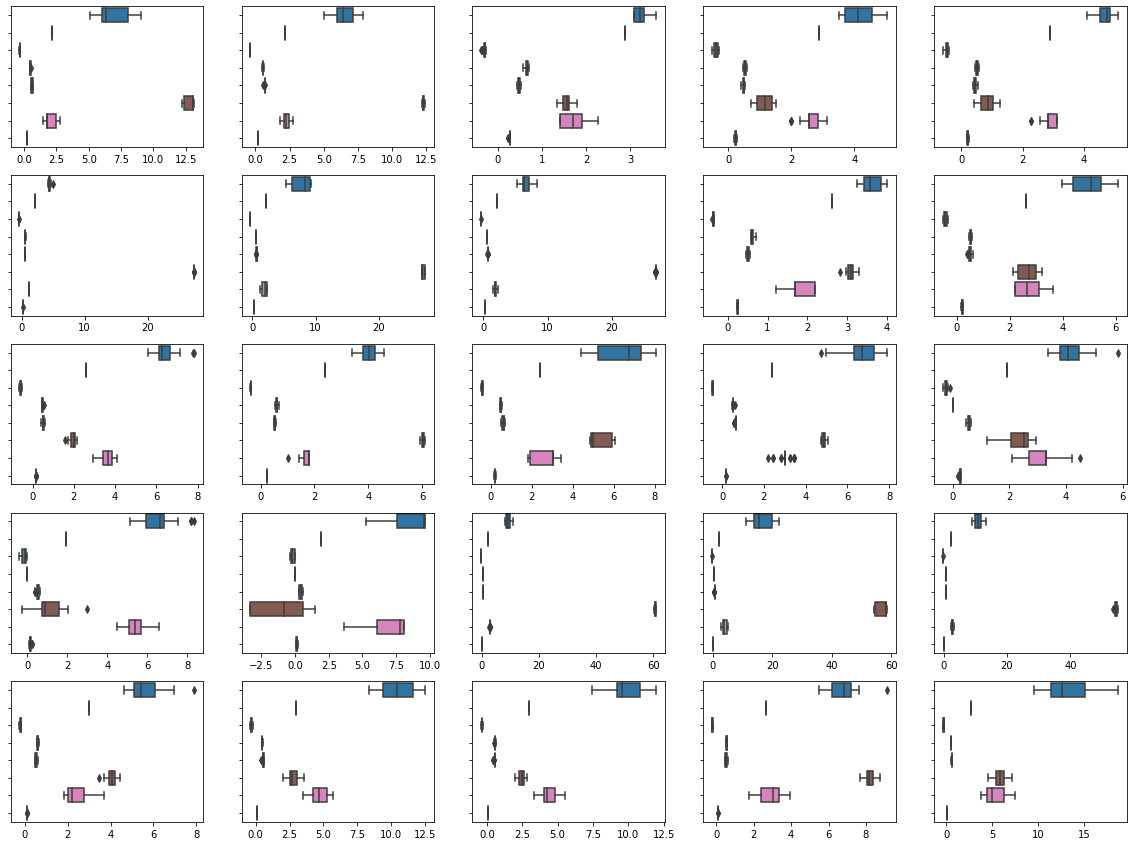

In [64]:
plt.figure(figsize=(20, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    fig=sns.boxplot(data=rbfm_2[i][1], orient="h")
    fig.set(yticklabels=[])

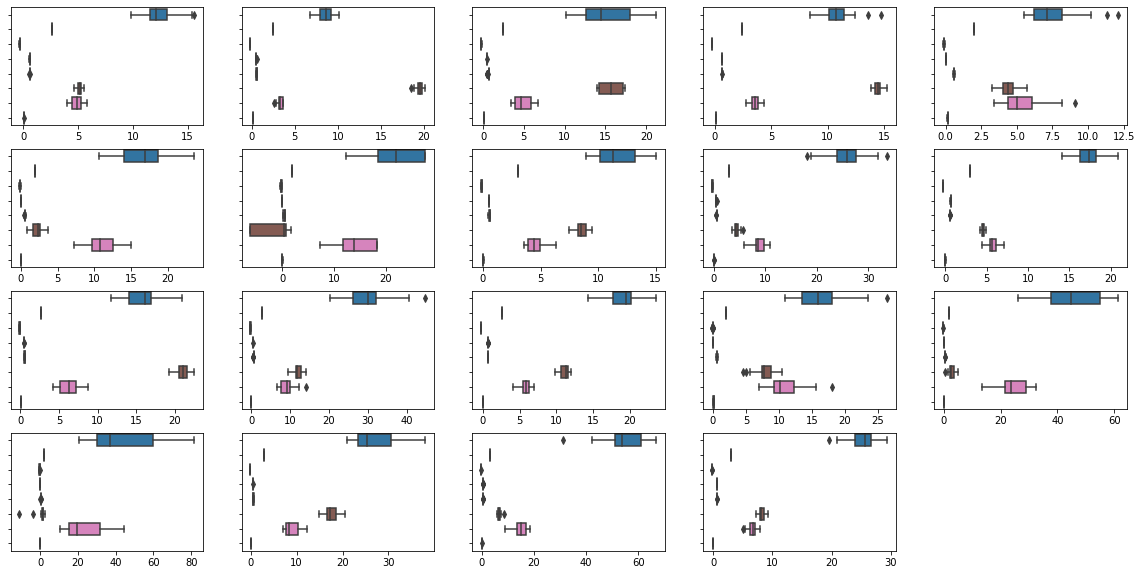

In [78]:
plt.figure(figsize=(20, 10))
for i in range(19):
    plt.subplot(4,5,i+1)
    fig=sns.boxplot(data=rbfm_3[i][1], orient="h")
    fig.set(yticklabels=[])

### Mixture

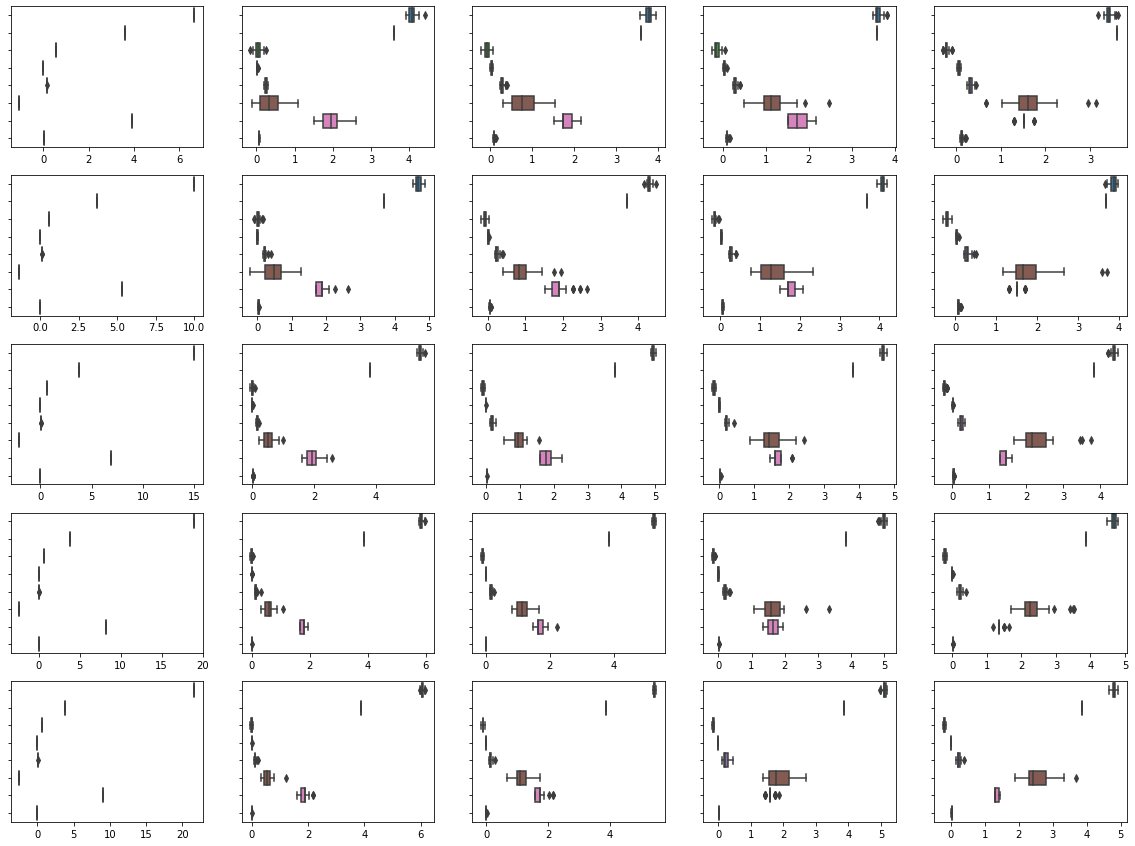

In [73]:
plt.figure(figsize=(20, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    fig=sns.boxplot(data=mixture_1[i][1], orient="h")
    fig.set(yticklabels=[])

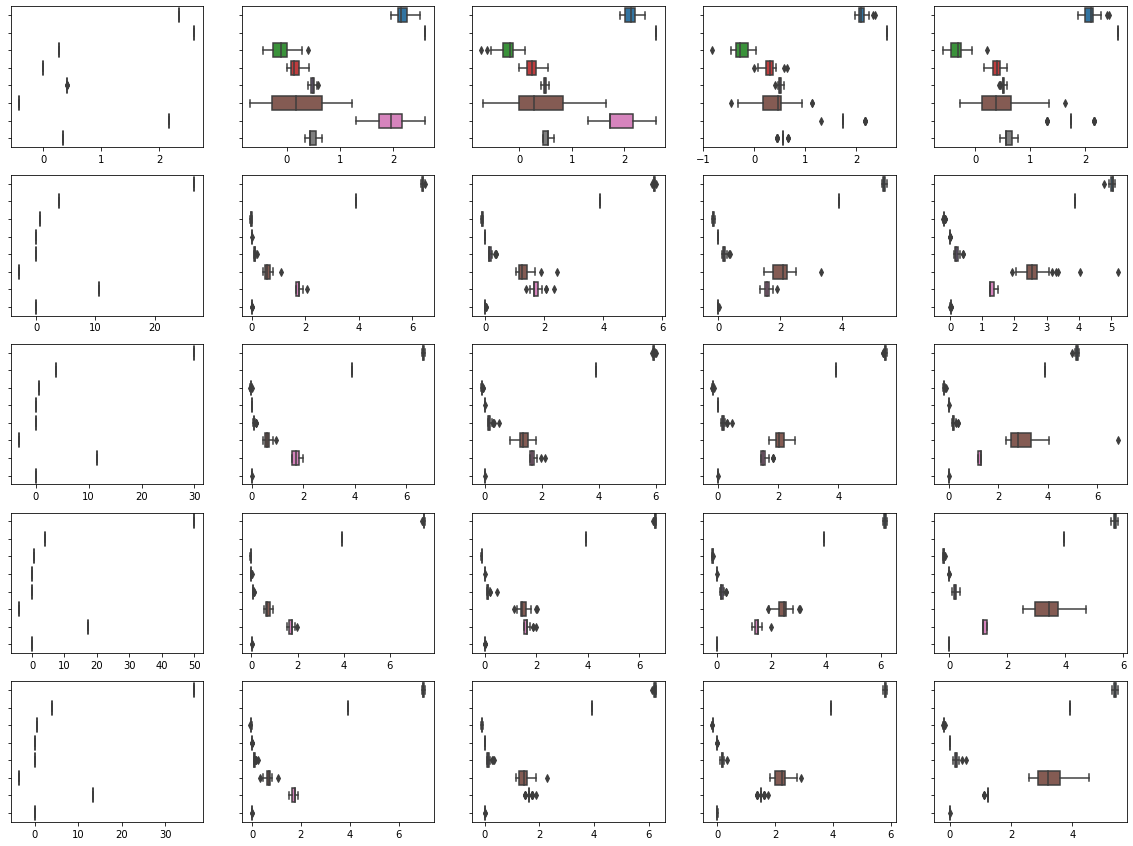

In [75]:
plt.figure(figsize=(20, 15))
for i in range(25):
    plt.subplot(5,5,i+1)
    fig=sns.boxplot(data=mixture_2[i][1], orient="h")
    fig.set(yticklabels=[])

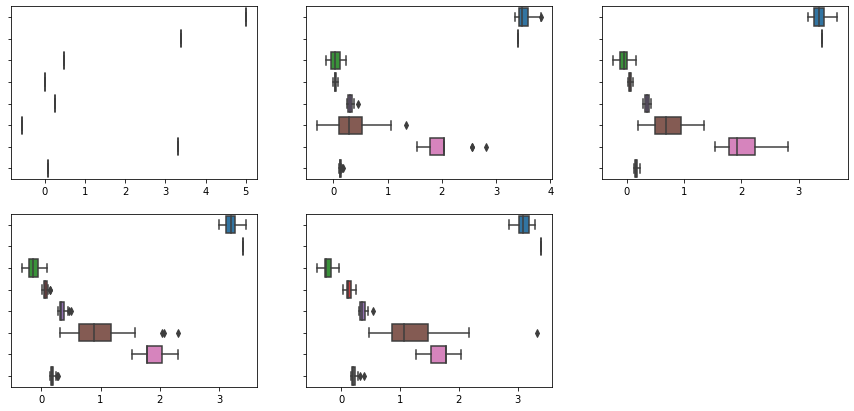

In [79]:
plt.figure(figsize=(15, 7))
for i in range(5):
    plt.subplot(2,3,i+1)
    fig=sns.boxplot(data=mixture_3[i][1], orient="h")
    fig.set(yticklabels=[])

___

### Final stability plots -- RBFM:

In [15]:
rbfm_to_plot = []
rbfm_to_plot_params = ['1.0_2.0_0.0', '1.0_2.0_0.5', '1.0_2.0_1.0', '1.0_5.0_0.0', '1.0_5.0_0.5', '1.0_5.0_1.0',
                      '1.0_20.0_0.0', '1.0_20.0_0.5', '1.0_20.0_1.0', '2.0_2.0_0.0', '2.0_2.0_0.5', '2.0_2.0_1.0',
                      '2.0_5.0_0.0', '2.0_5.0_0.5', '2.0_5.0_1.0', '2.0_20.0_0.0', '2.0_20.0_0.5', '2.0_20.0_1.0',
                      '3.0_2.0_0.0', '3.0_2.0_0.5', '3.0_2.0_1.0', '3.0_5.0_0.0', '3.0_5.0_0.5', '3.0_5.0_1.0',
                      '4.0_2.0_0.0', '4.0_2.0_0.5', '4.0_2.0_1.0']

for item in rbfm:
    if item[0][:-5] in rbfm_to_plot_params:
        rbfm_to_plot+=[item]

In [19]:
df_path = pd.DataFrame()
df_deg = pd.DataFrame()
df_assortativity = pd.DataFrame()
df_clust = pd.DataFrame()
df_eigen = pd.DataFrame()
df_skew = pd.DataFrame()
df_diam = pd.DataFrame()
df_maxdeg = pd.DataFrame()

for item in rbfm_to_plot:
    df_path[item[0][:-5]] = item[1]['avg_path_length']
    df_deg[item[0][:-5]] = item[1]['avg_deg']
    df_assortativity[item[0][:-5]] = item[1]['assortativity']
    df_clust[item[0][:-5]] = item[1]['avg_clust']
    df_eigen[item[0][:-5]] = item[1]['max_eigen']
    df_skew[item[0][:-5]] = item[1]['skew_deg_dist']
    df_diam[item[0][:-5]] = item[1]['diam_logsize']
    df_maxdeg[item[0][:-5]] = item[1]['max_deg_n']

In [33]:
df_path.to_excel("to_plot/RBFM_avg_path_length.xlsx")
df_deg.to_excel("to_plot/RBFM_avg_deg.xlsx")
df_assortativity.to_excel("to_plot/RBFM_assortativity.xlsx")
df_clust.to_excel("to_plot/RBFM_avg_clust.xlsx")
df_eigen.to_excel("to_plot/RBFM_max_eigen.xlsx")
df_skew.to_excel("to_plot/RBFM_skew_deg_dist.xlsx")
df_diam.to_excel("to_plot/RBFM_diam_logsize.xlsx")
df_maxdeg.to_excel("to_plot/RBFM_max_deg_n.xlsx")

___

In [6]:
df_path = data_import_metrics("to_plot/RBFM_avg_path_length.xlsx")
df_deg = data_import_metrics("to_plot/RBFM_avg_deg.xlsx")
df_assortativity = data_import_metrics("to_plot/RBFM_assortativity.xlsx")
df_clust = data_import_metrics("to_plot/RBFM_avg_clust.xlsx")
df_eigen = data_import_metrics("to_plot/RBFM_max_eigen.xlsx")
df_skew = data_import_metrics("to_plot/RBFM_skew_deg_dist.xlsx")
df_diam = data_import_metrics("to_plot/RBFM_diam_logsize.xlsx")
df_maxdeg = data_import_metrics("to_plot/RBFM_max_deg_n.xlsx")

[[]]

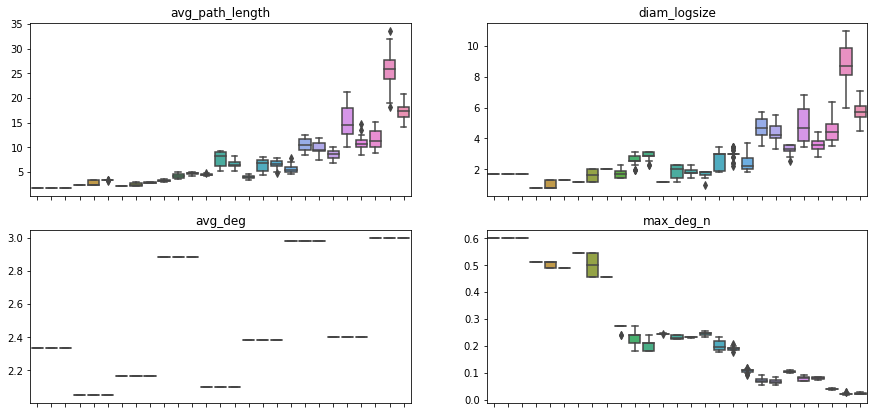

In [5]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.boxplot(data=df_path)
plt.title('avg_path_length')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.boxplot(data=df_diam)
plt.title('diam_logsize')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.boxplot(data=df_deg)
plt.title('avg_deg')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.boxplot(data=df_maxdeg)
plt.title('max_deg_n')
fig.set(xticklabels=[])

[[]]

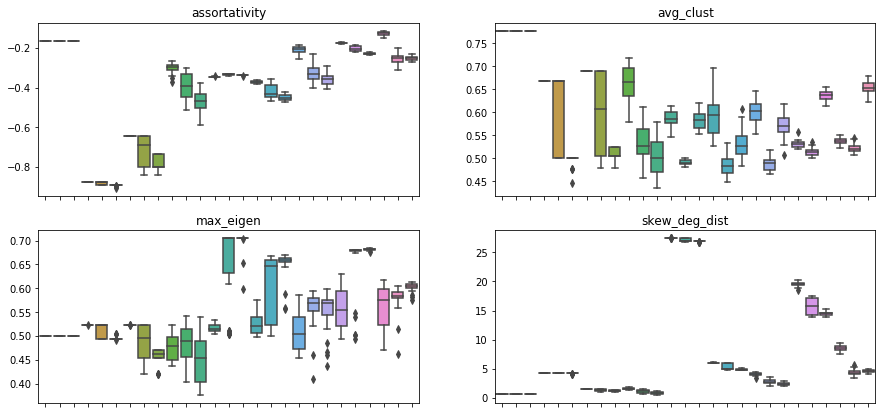

In [6]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.boxplot(data=df_assortativity)
plt.title('assortativity')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.boxplot(data=df_clust)
plt.title('avg_clust')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.boxplot(data=df_eigen)
plt.title('max_eigen')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.boxplot(data=df_skew)
plt.title('skew_deg_dist')
fig.set(xticklabels=[])

___

### Final stability plots -- Mixture:

In [74]:
mixture_to_plot = []
mixture_to_plot_params = ['5_10.0_0.0', '5_10.0_0.01', '5_10.0_0.05', '5_10.0_0.1', '5_10.0_0.25', '5_10.0_0.5', '5_10.0_0.75', '5_10.0_1.0',
                         '10_20.0_0.0', '10_20.0_0.01', '10_20.0_0.05', '10_20.0_0.1', '10_20.0_0.25', '10_20.0_0.5', '10_20.0_0.75', '10_20.0_1.0',
                         '25_32.0_0.0', '25_32.0_0.01', '25_32.0_0.05', '25_32.0_0.1', '25_32.0_0.25', '25_32.0_0.5', '25_32.0_0.75', '25_32.0_1.0',
                         '30_50.0_0.0', '30_50.0_0.01', '30_50.0_0.05', '30_50.0_0.1', '30_50.0_0.25', '30_50.0_0.5', '30_50.0_0.75', '30_50.0_1.0',
                         '50_60.0_0.0', '50_60.0_0.01', '50_60.0_0.05', '50_60.0_0.1', '50_60.0_0.25', '50_60.0_0.5', '50_60.0_0.75', '50_60.0_1.0']

for item in mixture:
    if item[0][:-5] in mixture_to_plot_params:
        mixture_to_plot+=[item]

In [75]:
df_path = pd.DataFrame()
df_deg = pd.DataFrame()
df_assortativity = pd.DataFrame()
df_clust = pd.DataFrame()
df_eigen = pd.DataFrame()
df_skew = pd.DataFrame()
df_diam = pd.DataFrame()
df_maxdeg = pd.DataFrame()

for item in mixture_to_plot:
    df_path[item[0][:-5]] = item[1]['avg_path_length']
    df_deg[item[0][:-5]] = item[1]['avg_deg']
    df_assortativity[item[0][:-5]] = item[1]['assortativity']
    df_clust[item[0][:-5]] = item[1]['avg_clust']
    df_eigen[item[0][:-5]] = item[1]['max_eigen']
    df_skew[item[0][:-5]] = item[1]['skew_deg_dist']
    df_diam[item[0][:-5]] = item[1]['diam_logsize']
    df_maxdeg[item[0][:-5]] = item[1]['max_deg_n']

In [76]:
def change_column_order(df):
    cols = df.columns.tolist()
    cols = cols[-5:] + cols[:-5]
    df = df[cols]
    
    return df

In [77]:
df_path = change_column_order(df_path)
df_deg = change_column_order(df_deg)
df_assortativity = change_column_order(df_assortativity)
df_clust = change_column_order(df_clust)
df_eigen = change_column_order(df_eigen)
df_skew = change_column_order(df_skew)
df_diam = change_column_order(df_diam)
df_maxdeg = change_column_order(df_maxdeg)

In [78]:
df_path.to_excel("to_plot/Mixture_avg_path_length.xlsx")
df_deg.to_excel("to_plot/Mixture_avg_deg.xlsx")
df_assortativity.to_excel("to_plot/Mixture_assortativity.xlsx")
df_clust.to_excel("to_plot/Mixture_avg_clust.xlsx")
df_eigen.to_excel("to_plot/Mixture_max_eigen.xlsx")
df_skew.to_excel("to_plot/Mixture_skew_deg_dist.xlsx")
df_diam.to_excel("to_plot/Mixture_diam_logsize.xlsx")
df_maxdeg.to_excel("to_plot/Mixture_max_deg_n.xlsx")

___

In [79]:
df_path = data_import_metrics("to_plot/Mixture_avg_path_length.xlsx")
df_deg = data_import_metrics("to_plot/Mixture_avg_deg.xlsx")
df_assortativity = data_import_metrics("to_plot/Mixture_assortativity.xlsx")
df_clust = data_import_metrics("to_plot/Mixture_avg_clust.xlsx")
df_eigen = data_import_metrics("to_plot/Mixture_max_eigen.xlsx")
df_skew = data_import_metrics("to_plot/Mixture_skew_deg_dist.xlsx")
df_diam = data_import_metrics("to_plot/Mixture_diam_logsize.xlsx")
df_maxdeg = data_import_metrics("to_plot/Mixture_max_deg_n.xlsx")

[[]]

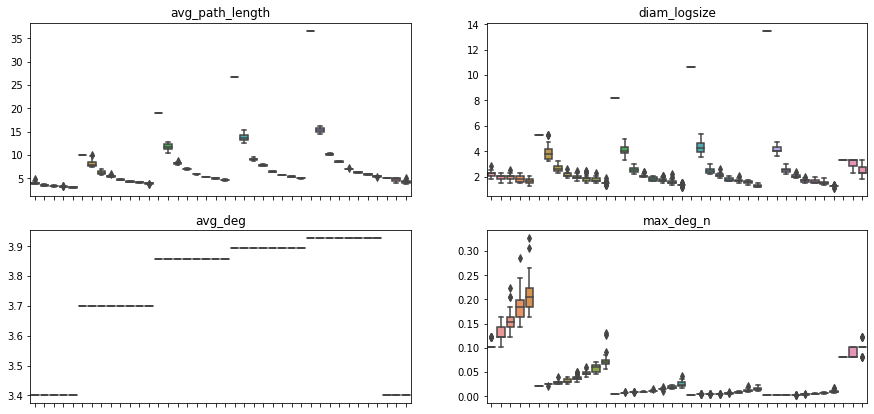

In [80]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.boxplot(data=df_path)
plt.title('avg_path_length')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.boxplot(data=df_diam)
plt.title('diam_logsize')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.boxplot(data=df_deg)
plt.title('avg_deg')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.boxplot(data=df_maxdeg)
plt.title('max_deg_n')
fig.set(xticklabels=[])

[[]]

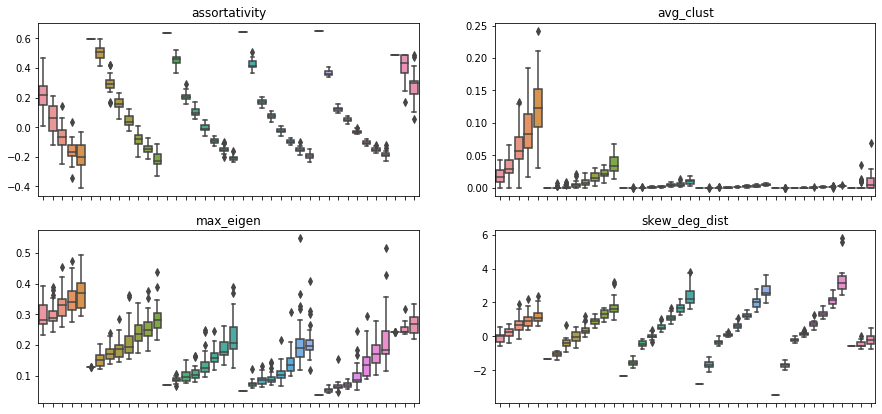

In [81]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.boxplot(data=df_assortativity)
plt.title('assortativity')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.boxplot(data=df_clust)
plt.title('avg_clust')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.boxplot(data=df_eigen)
plt.title('max_eigen')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.boxplot(data=df_skew)
plt.title('skew_deg_dist')
fig.set(xticklabels=[])

___

### Mixture: V és skew_deg_dist kapcsolata

Nagyobb p --> nagyobb skew_deg_dist

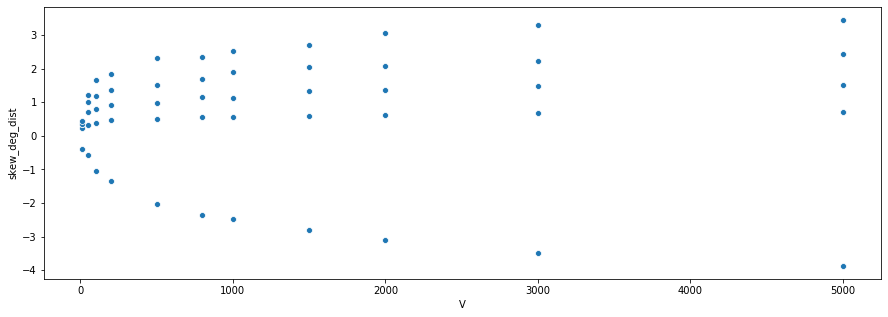

In [10]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=mixture_avg, x="V", y="skew_deg_dist")

### Paraméterek függvényében metrikák scatterplotja:

In [19]:
def datagenerator_modelparam(list_of_dfs):
    df=pd.DataFrame(columns=('param1','param2','param3','avg_path_length', 'avg_deg', 'assortativity', 'avg_clust', 
                             'max_eigen','skew_deg_dist', 'diam_logsize', 'max_deg_n'))
    for item in list_of_dfs:
        param1, param2, param3 = item[0].strip(".xlsx").split("_")
        params = pd.Series(np.array([float(param1), float(param2), float(param3)]), index =['param1','param2','param3'])
        
        row = pd.concat([params,item[1].mean()])
        
        df = df.append(row,ignore_index=True)
    
    return df

In [28]:
rbfm_avg = datagenerator_modelparam(rbfm)
mixture_avg = datagenerator_modelparam(mixture)
mixture_avg['V'] = mixture_avg['param1']*mixture_avg['param2']
shm_avg = datagenerator_modelparam(shm)

In [20]:
uvflower_avg = datagenerator_modelparam(uvflower)
uvflower_avg.to_excel("to_plot/uvflower_metrics.xlsx")

In [29]:
rbfm_avg.to_excel("to_plot/RBFM_avg.xlsx")
mixture_avg.to_excel("to_plot/Mixture_avg.xlsx")
shm_avg.to_excel("to_plot/SHM_avg.xlsx")

In [ ]:
def data_import_metrics(file):
    dataframe= pd.read_excel(file)
    dataframe = dataframe.drop(dataframe.columns[0], axis=1)
    
    return dataframe

In [ ]:
rbfm_avg = data_import_metrics("to_plot/RBFM_avg.xlsx")
mixture_avg = data_import_metrics("to_plot/Mixture_avg.xlsx")
shm_avg = data_import_metrics("to_plot/SHM_avg.xlsx")
uvflower_avg = data_import_metrics("to_plot/uvflower_avg.xlsx")

___

### Mixture:

[[]]

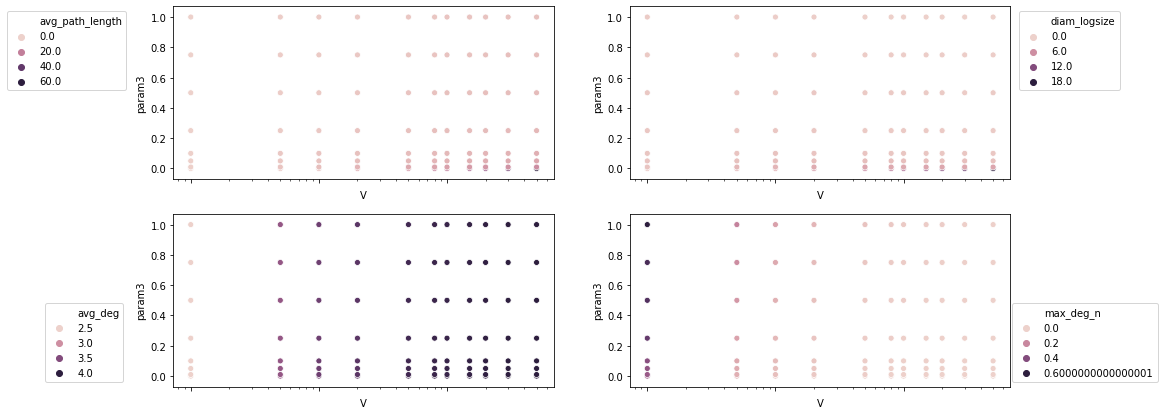

In [86]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="avg_path_length")
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(-0.45, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="diam_logsize")
plt.xscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="avg_deg")
plt.xscale('log')
plt.legend(loc='lower left', bbox_to_anchor=(-0.35, 0))
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="max_deg_n")
plt.xscale('log')
plt.legend(loc='lower right', bbox_to_anchor=(1.4, 0))
fig.set(xticklabels=[])

[[]]

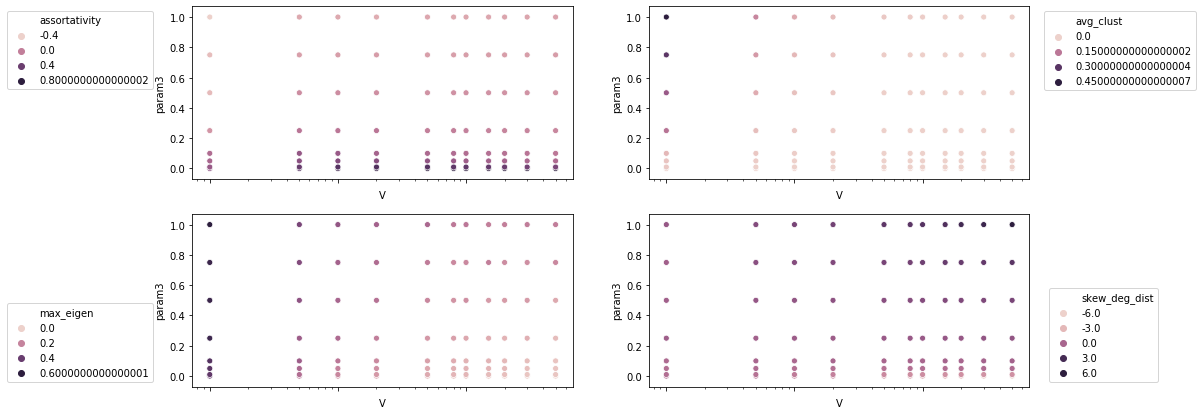

In [87]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="assortativity")
plt.xscale('log')
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="avg_clust")
plt.xscale('log')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="max_eigen")
plt.xscale('log')
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=mixture_avg, x="V", y="param3", hue="skew_deg_dist")
plt.xscale('log')
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0))
fig.set(xticklabels=[])

In [88]:
mixture_avg_path_length = mixture_avg.pivot(index='param3', columns='V', values='avg_path_length')
mixture_diam_logsize = mixture_avg.pivot(index='param3', columns='V', values='diam_logsize')
mixture_avg_deg = mixture_avg.pivot(index='param3', columns='V', values='avg_deg')
mixture_max_deg_n = mixture_avg.pivot(index='param3', columns='V', values='max_deg_n')
mixture_assortativity = mixture_avg.pivot(index='param3', columns='V', values='assortativity')
mixture_avg_clust = mixture_avg.pivot(index='param3', columns='V', values='avg_clust')
mixture_max_eigen = mixture_avg.pivot(index='param3', columns='V', values='max_eigen')
mixture_skew_deg_dist = mixture_avg.pivot(index='param3', columns='V', values='skew_deg_dist')

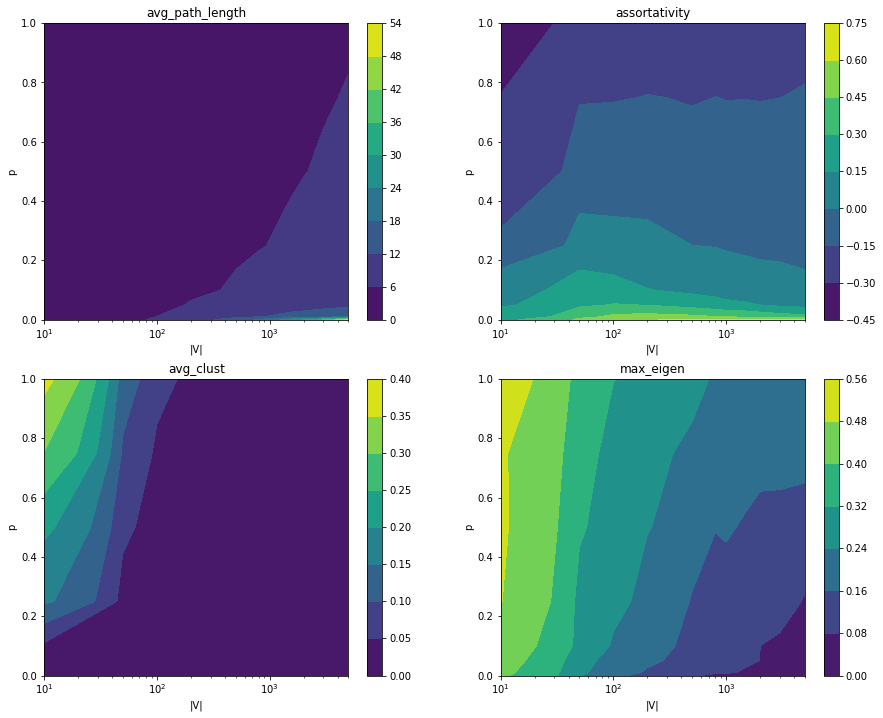

In [89]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
fig=plt.contourf(mixture_avg_path_length.columns, mixture_avg_path_length.index, mixture_avg_path_length.values)
plt.title("avg_path_length")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,2)
fig=plt.contourf(mixture_assortativity.columns, mixture_assortativity.index, mixture_assortativity.values)
plt.title("assortativity")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,3)
fig=plt.contourf(mixture_avg_clust.columns, mixture_avg_clust.index, mixture_avg_clust.values)
plt.title("avg_clust")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,4)
fig=plt.contourf(mixture_max_eigen.columns, mixture_max_eigen.index, mixture_max_eigen.values)
plt.title("max_eigen")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.savefig("Mixture_contour")

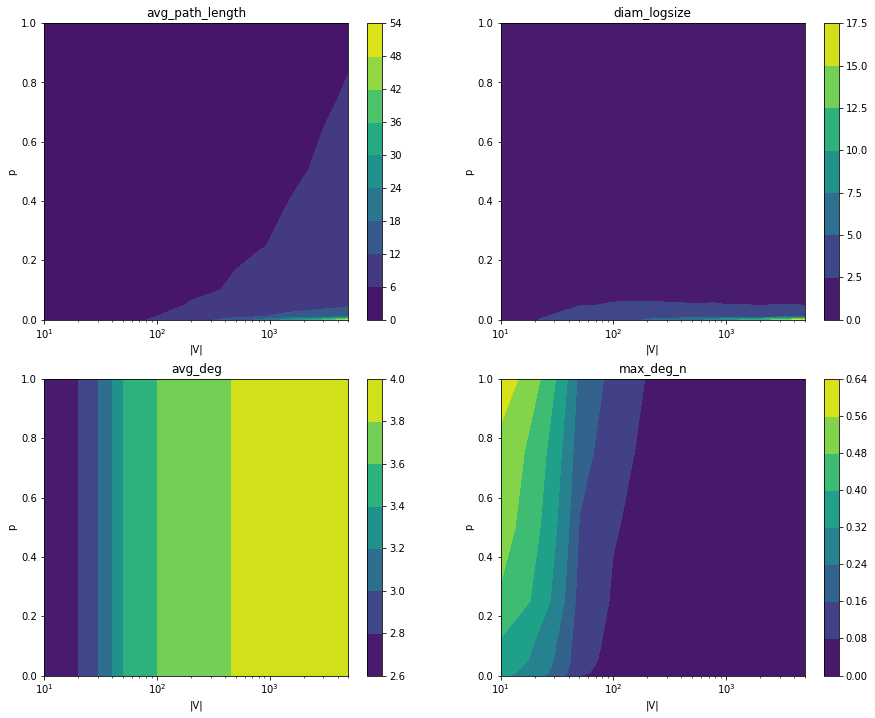

In [90]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
fig=plt.contourf(mixture_avg_path_length.columns, mixture_avg_path_length.index, mixture_avg_path_length.values)
plt.title("avg_path_length")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,2)
fig=plt.contourf(mixture_diam_logsize.columns, mixture_diam_logsize.index, mixture_diam_logsize.values)
plt.title("diam_logsize")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,3)
fig=plt.contourf(mixture_avg_deg.columns, mixture_avg_deg.index, mixture_avg_deg.values)
plt.title("avg_deg")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,4)
fig=plt.contourf(mixture_max_deg_n.columns, mixture_max_deg_n.index, mixture_max_deg_n.values)
plt.title("max_deg_n")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.savefig("Mixture_contour1")

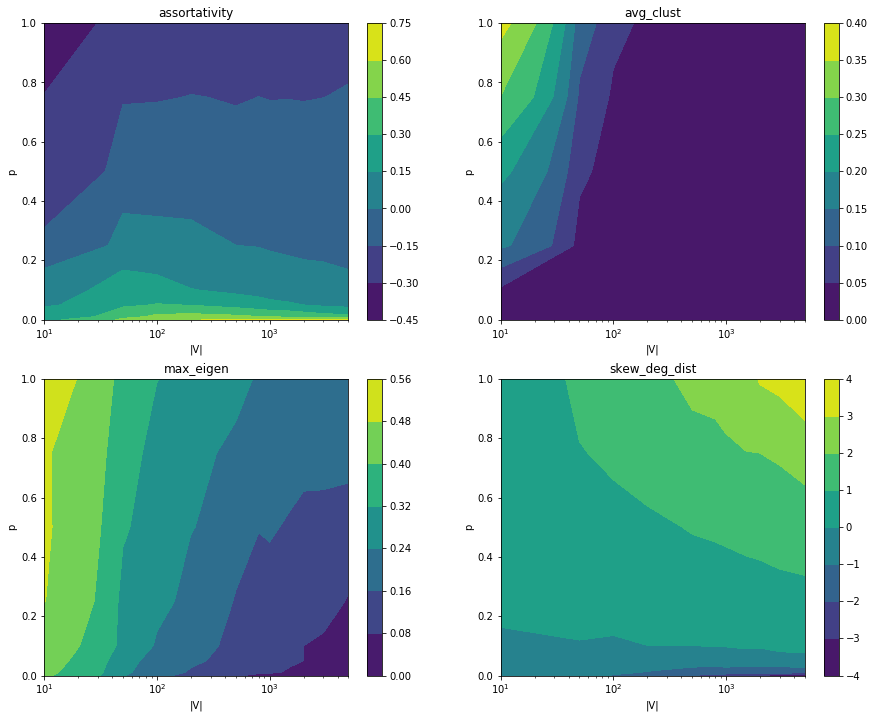

In [91]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
fig=plt.contourf(mixture_assortativity.columns, mixture_assortativity.index, mixture_assortativity.values)
plt.title("assortativity")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,2)
fig=plt.contourf(mixture_avg_clust.columns, mixture_avg_clust.index, mixture_avg_clust.values)
plt.title("avg_clust")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,3)
fig=plt.contourf(mixture_max_eigen.columns, mixture_max_eigen.index, mixture_max_eigen.values)
plt.title("max_eigen")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,4)
fig=plt.contourf(mixture_skew_deg_dist.columns, mixture_skew_deg_dist.index, mixture_skew_deg_dist.values)
plt.title("skew_deg_dist")
plt.xlabel("|V|")
plt.ylabel("p")
plt.xscale('log')
plt.colorbar()

plt.savefig("Mixture_contour2")

### RBFM:

In [20]:
rbfm_avg_1 = rbfm_avg[rbfm_avg['param1']==1]
rbfm_avg_2 = rbfm_avg[rbfm_avg['param1']==2]
rbfm_avg_3 = rbfm_avg[rbfm_avg['param1']==3]
rbfm_avg_4 = rbfm_avg[rbfm_avg['param1']==4]
rbfm_avg_5 = rbfm_avg[rbfm_avg['param1']==5]

### n = 1:

[[]]

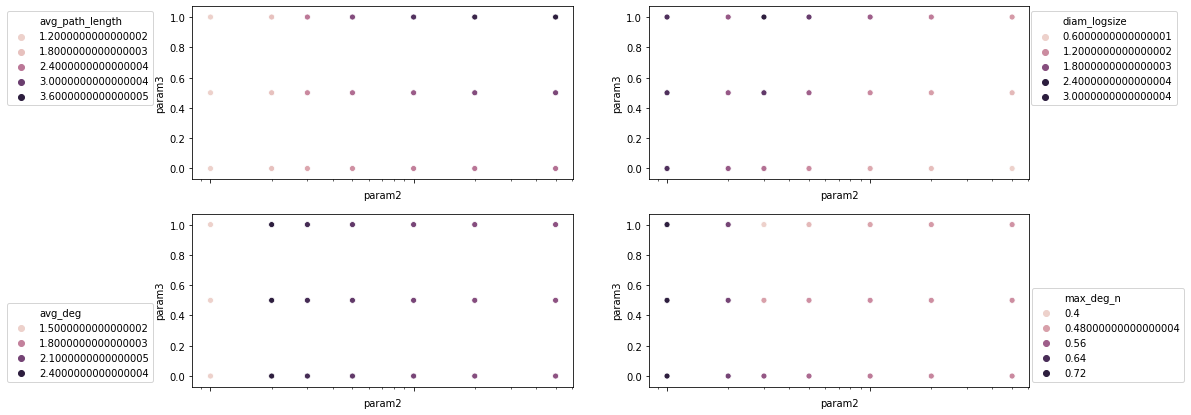

In [109]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="avg_path_length")
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="diam_logsize")
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="avg_deg")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="max_deg_n")
plt.legend(loc='lower right', bbox_to_anchor=(1.42, 0))
plt.xscale('log')
fig.set(xticklabels=[])

[[]]

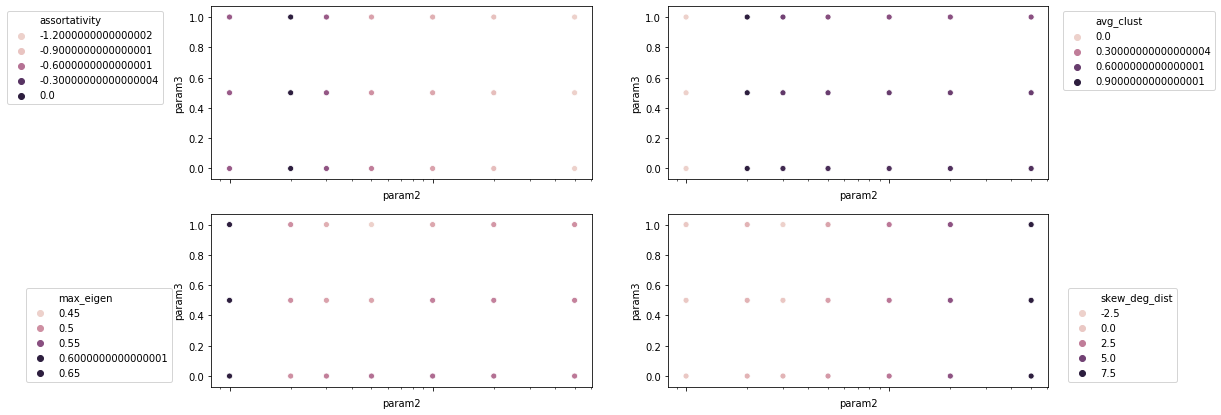

In [112]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="assortativity")
plt.legend(loc='upper left', bbox_to_anchor=(-0.55, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="avg_clust")
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="max_eigen")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_1, x="param2", y="param3", hue="skew_deg_dist")
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0))
plt.xscale('log')
fig.set(xticklabels=[])

### n = 2:

[[]]

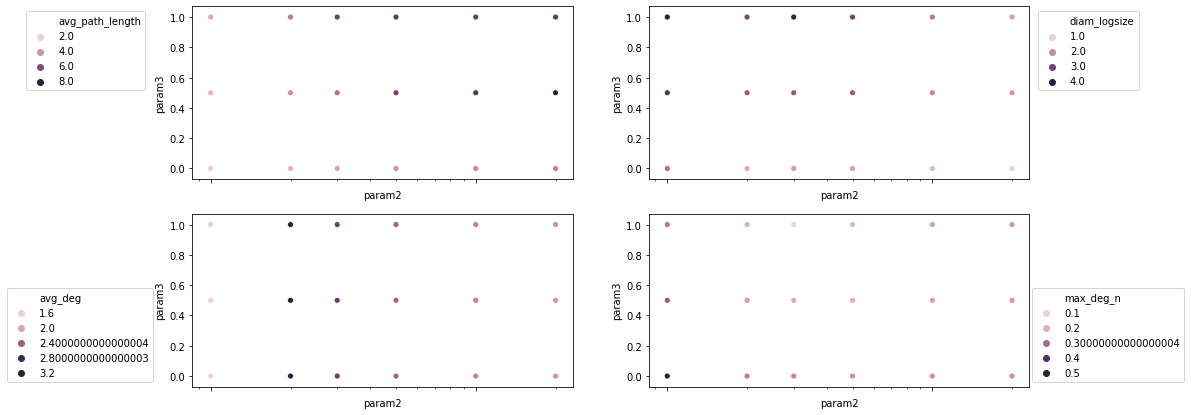

In [115]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="avg_path_length")
plt.legend(loc='upper left', bbox_to_anchor=(-0.45, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="diam_logsize")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="avg_deg")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="max_deg_n")
plt.legend(loc='lower right', bbox_to_anchor=(1.42, 0))
plt.xscale('log')
fig.set(xticklabels=[])

[[]]

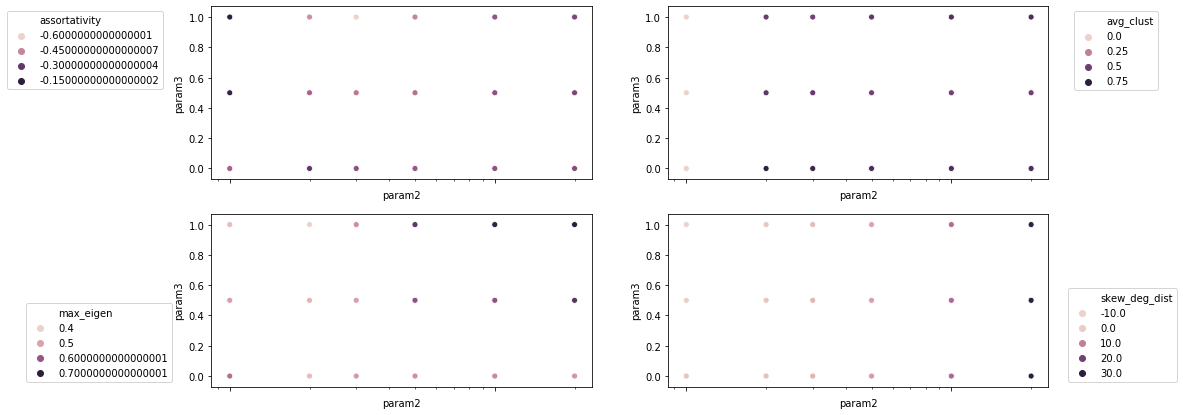

In [118]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="assortativity")
plt.legend(loc='upper left', bbox_to_anchor=(-0.55, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="avg_clust")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="max_eigen")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_2, x="param2", y="param3", hue="skew_deg_dist")
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0))
plt.xscale('log')
fig.set(xticklabels=[])

### n = 3:

[[]]

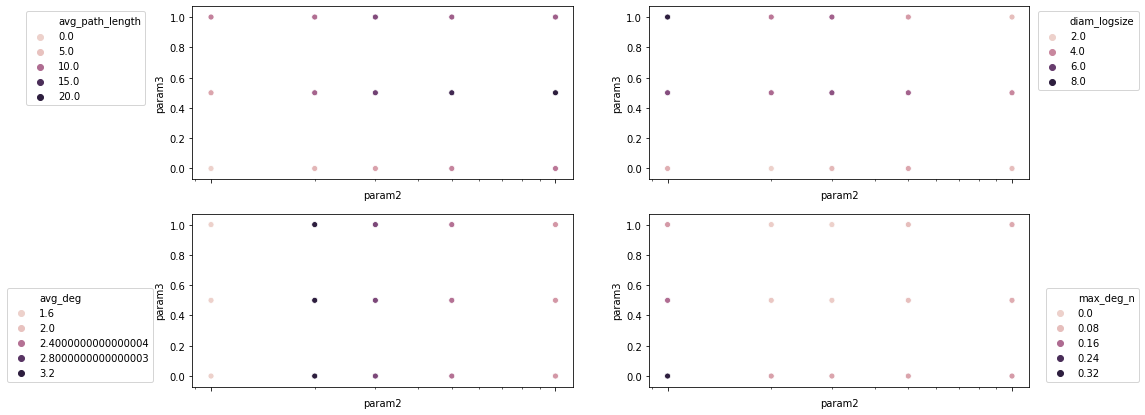

In [121]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="avg_path_length")
plt.legend(loc='upper left', bbox_to_anchor=(-0.45, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="diam_logsize")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="avg_deg")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="max_deg_n")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0))
plt.xscale('log')
fig.set(xticklabels=[])

[[]]

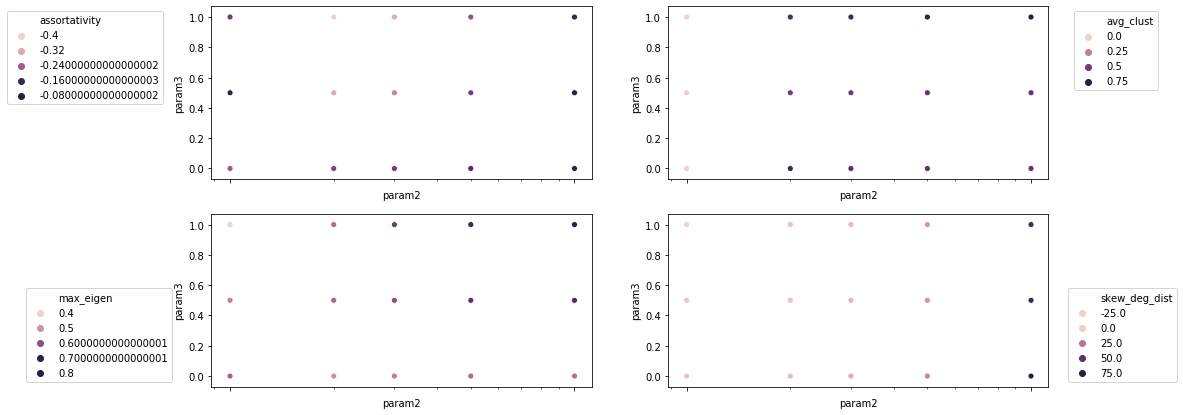

In [122]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="assortativity")
plt.legend(loc='upper left', bbox_to_anchor=(-0.55, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="avg_clust")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="max_eigen")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
plt.xscale('log')
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_3, x="param2", y="param3", hue="skew_deg_dist")
plt.legend(loc='lower right', bbox_to_anchor=(1.35, 0))
plt.xscale('log')
fig.set(xticklabels=[])

### n = 4:

[[]]

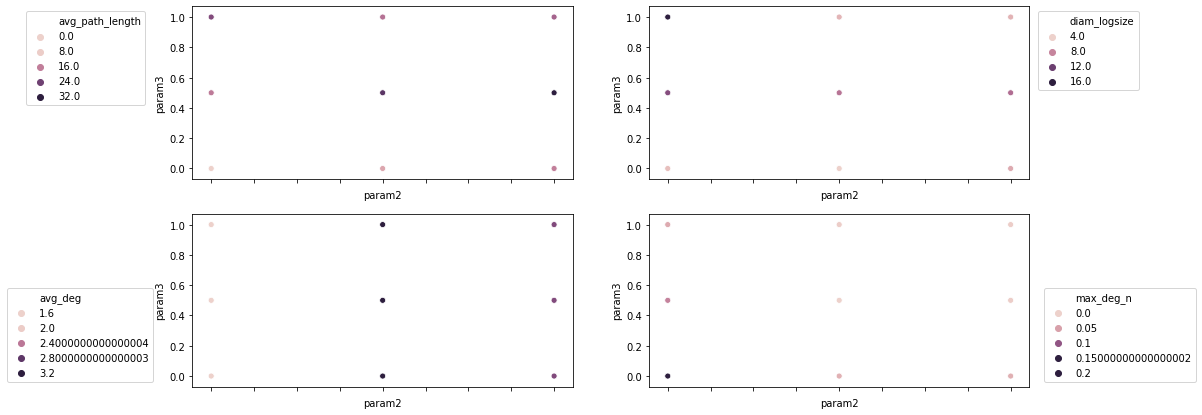

In [125]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=sns.scatterplot(data=rbfm_avg_4, x="param2", y="param3", hue="avg_path_length")
plt.legend(loc='upper left', bbox_to_anchor=(-0.45, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,2)
fig=sns.scatterplot(data=rbfm_avg_4, x="param2", y="param3", hue="diam_logsize")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
fig.set(xticklabels=[])

plt.subplot(2,2,3)
fig=sns.scatterplot(data=rbfm_avg_4, x="param2", y="param3", hue="avg_deg")
plt.legend(loc='lower left', bbox_to_anchor=(-0.5, 0))
fig.set(xticklabels=[])

plt.subplot(2,2,4)
fig=sns.scatterplot(data=rbfm_avg_4, x="param2", y="param3", hue="max_deg_n")
plt.legend(loc='lower right', bbox_to_anchor=(1.45, 0))
fig.set(xticklabels=[])

In [21]:
rbfm_1_max_deg_n = rbfm_avg_1.pivot(index='param3', columns='param2', values='max_deg_n')
rbfm_1_avg_path_length = rbfm_avg_1.pivot(index='param3', columns='param2', values='avg_path_length')
rbfm_1_assortativity = rbfm_avg_1.pivot(index='param3', columns='param2', values='assortativity')
rbfm_2_avg_path_length = rbfm_avg_2.pivot(index='param3', columns='param2', values='avg_path_length')
rbfm_2_diam_logsize = rbfm_avg_2.pivot(index='param3', columns='param2', values='diam_logsize')
rbfm_2_max_eigen = rbfm_avg_2.pivot(index='param3', columns='param2', values='max_eigen')
rbfm_2_assortativity = rbfm_avg_2.pivot(index='param3', columns='param2', values='assortativity')
rbfm_3_avg_path_length = rbfm_avg_3.pivot(index='param3', columns='param2', values='avg_path_length')
rbfm_3_diam_logsize = rbfm_avg_3.pivot(index='param3', columns='param2', values='diam_logsize')
rbfm_3_max_eigen = rbfm_avg_3.pivot(index='param3', columns='param2', values='max_eigen')
rbfm_3_assortativity = rbfm_avg_3.pivot(index='param3', columns='param2', values='assortativity')

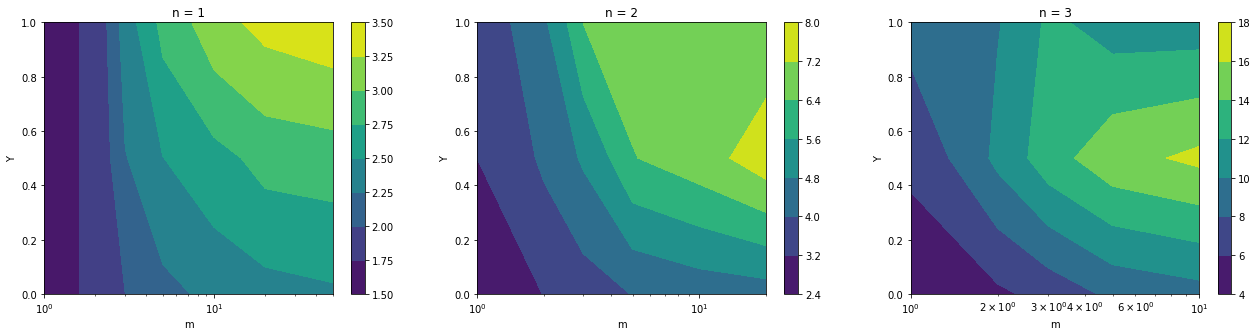

In [29]:
plt.figure(figsize=(22, 5))

plt.subplot(1,3,1)
fig=plt.contourf(rbfm_1_avg_path_length.columns, rbfm_1_avg_path_length.index, rbfm_1_avg_path_length.values)
plt.title("n = 1")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,2)
fig=plt.contourf(rbfm_2_avg_path_length.columns, rbfm_2_avg_path_length.index, rbfm_2_avg_path_length.values)
plt.title("n = 2")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,3)
fig=plt.contourf(rbfm_3_avg_path_length.columns, rbfm_3_avg_path_length.index, rbfm_3_avg_path_length.values)
plt.title("n = 3")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.savefig("RBFM_contour_path")

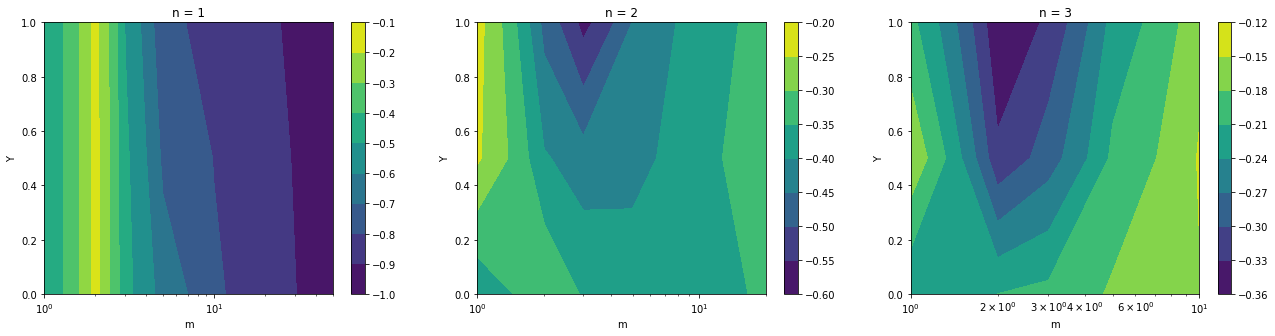

In [30]:
plt.figure(figsize=(22, 5))

plt.subplot(1,3,1)
fig=plt.contourf(rbfm_1_assortativity.columns, rbfm_1_assortativity.index, rbfm_1_assortativity.values)
plt.title("n = 1")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,2)
fig=plt.contourf(rbfm_2_assortativity.columns, rbfm_2_assortativity.index, rbfm_2_assortativity.values)
plt.title("n = 2")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,3)
fig=plt.contourf(rbfm_3_assortativity.columns, rbfm_3_assortativity.index, rbfm_3_assortativity.values)
plt.title("n = 3")
plt.xlabel("m")
plt.ylabel("Y")
plt.xscale('log')
plt.colorbar()

plt.savefig("RBFM_contour_assortativity")

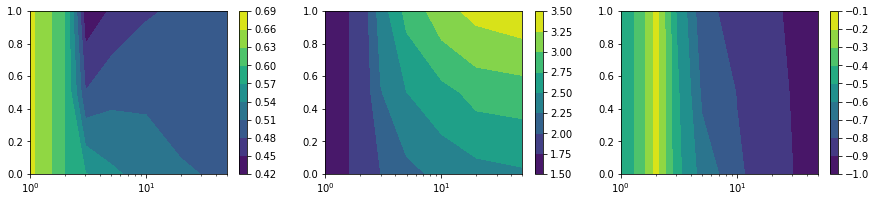

In [22]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
fig=plt.contourf(rbfm_1_max_deg_n.columns, rbfm_1_max_deg_n.index, rbfm_1_max_deg_n.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,2)
fig=plt.contourf(rbfm_1_avg_path_length.columns, rbfm_1_avg_path_length.index, rbfm_1_avg_path_length.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(1,3,3)
fig=plt.contourf(rbfm_1_assortativity.columns, rbfm_1_assortativity.index, rbfm_1_assortativity.values)
plt.xscale('log')
plt.colorbar()

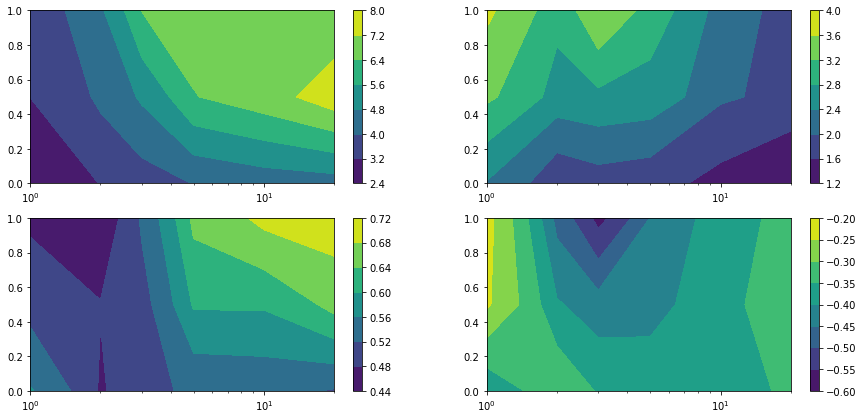

In [23]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=plt.contourf(rbfm_2_avg_path_length.columns, rbfm_2_avg_path_length.index, rbfm_2_avg_path_length.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,2)
fig=plt.contourf(rbfm_2_diam_logsize.columns, rbfm_2_diam_logsize.index, rbfm_2_diam_logsize.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,3)
fig=plt.contourf(rbfm_2_max_eigen.columns, rbfm_2_max_eigen.index, rbfm_2_max_eigen.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,4)
fig=plt.contourf(rbfm_2_assortativity.columns, rbfm_2_assortativity.index, rbfm_2_assortativity.values)
plt.xscale('log')
plt.colorbar()

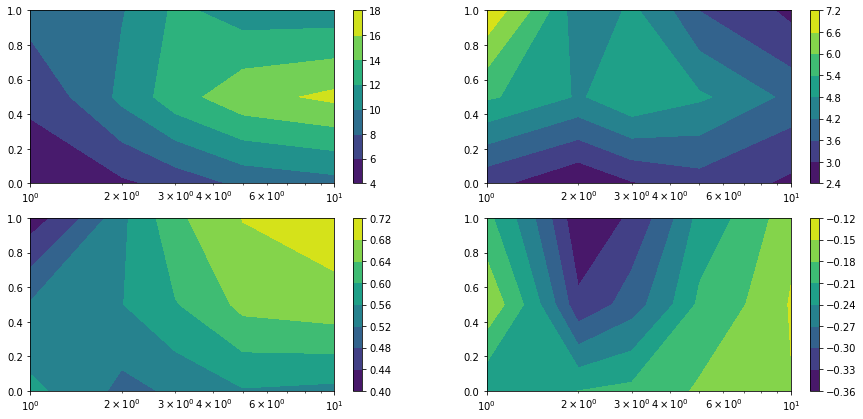

In [24]:
plt.figure(figsize=(15, 7))

plt.subplot(2,2,1)
fig=plt.contourf(rbfm_3_avg_path_length.columns, rbfm_3_avg_path_length.index, rbfm_3_avg_path_length.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,2)
fig=plt.contourf(rbfm_3_diam_logsize.columns, rbfm_3_diam_logsize.index, rbfm_3_diam_logsize.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,3)
fig=plt.contourf(rbfm_3_max_eigen.columns, rbfm_3_max_eigen.index, rbfm_3_max_eigen.values)
plt.xscale('log')
plt.colorbar()

plt.subplot(2,2,4)
fig=plt.contourf(rbfm_3_assortativity.columns, rbfm_3_assortativity.index, rbfm_3_assortativity.values)
plt.xscale('log')
plt.colorbar()

### Scatterplots of fitted parameters:

RBFM:

In [34]:
inf_berlin = data_import_metrics("database_rbfm_30/inf/Berlin-2009-adjacency.net.xlsx")
metabolic_ce = data_import_metrics("database_rbfm_30/metabolic/bio-CE-GT.edgelist.xlsx")
foodweb_aishihik = data_import_metrics("database_rbfm_30/foodweb/aishihik_p.txt.xlsx")

In [35]:
def create_params(dataframe):
    params = dataframe['parameters'].str.strip('()').str.split(",", expand = True)
    dataframe['param1'], dataframe['param2'], dataframe['param3'] = pd.to_numeric(params[0]), pd.to_numeric(params[1]), pd.to_numeric(params[2])
    dataframe.drop(columns =["parameters"], inplace = True)
    return dataframe

In [36]:
inf_berlin = create_params(inf_berlin)
metabolic_ce = create_params(metabolic_ce)
foodweb_aishihik = create_params(foodweb_aishihik)

In [37]:
def create_count(dataframe):
    df_group = dataframe.groupby(['param1','param2','param3'])['avg_deg']
    df_count = df_group.count()
    
    i=0
    conditions = []
    values = []
    for item in df_count.index:
        condition = [(dataframe['param1']==item[0]) & (dataframe['param2']==item[1]) & (dataframe['param3']==item[2])]
        value = [df_count.iloc[i]]
        conditions+=condition
        values+=value
        i+=1

    dataframe['count'] = np.select(conditions, values)
    
    return dataframe

In [38]:
inf_berlin_final = create_count(inf_berlin)
metabolic_ce_final = create_count(metabolic_ce)
foodweb_aishihik_final = create_count(foodweb_aishihik)

In [39]:
import plotly.express as px

In [45]:
fig = px.scatter_3d(inf_berlin_final, x='param1', y='param2', z='param3', size='count',
                   labels={
                     "param1": "n",
                     "param2": "m",
                     "param3": "Y"})
fig.show()

In [46]:
fig = px.scatter_3d(metabolic_ce_final, x='param1', y='param2', z='param3', size='count',
                   labels={
                     "param1": "n",
                     "param2": "m",
                     "param3": "Y"})
fig.show()

In [47]:
fig = px.scatter_3d(foodweb_aishihik_final, x='param1', y='param2', z='param3', size='count',
                   labels={
                     "param1": "n",
                     "param2": "m",
                     "param3": "Y"})
fig.show()

Mixture:

In [48]:
chems1 = data_import_metrics("database_mixture_30/chems/ENZYMES_g101.edges.xlsx")
chems2 = data_import_metrics("database_mixture_30/chems/ENZYMES_g292.edges.xlsx")
brain1 = data_import_metrics("database_mixture_30/brain/drosophila_medulla_1.edgelist.xlsx")
brain2 = data_import_metrics("database_mixture_30/brain/mouse_brain_1.edgelist.xlsx")
metabolic1 = data_import_metrics("database_mixture_30/metabolic/bio-CE-GT.edgelist.xlsx")
metabolic2 = data_import_metrics("database_mixture_30/metabolic/yeast_paj.edgelist.xlsx")
inf1 = data_import_metrics("database_mixture_30/inf/Berlin-2009-adjacency.net.xlsx")
inf2 = data_import_metrics("database_mixture_30/inf/Moscow-2009-adjacency.net.xlsx")
foodweb1 = data_import_metrics("database_mixture_30/foodweb/aishihik_p.txt.xlsx")
foodweb2 = data_import_metrics("database_mixture_30/foodweb/Everglades.paj.xlsx")
social1 = data_import_metrics("database_mixture_30/social/rt-retweet.mtx.xlsx")
social2 = data_import_metrics("database_mixture_30/social/rt_voteonedirection.edges.xlsx")

In [49]:
chems1 = create_params(chems1)
chems2 = create_params(chems2)
brain1 = create_params(brain1)
brain2 = create_params(brain2)
metabolic1 = create_params(metabolic1)
metabolic2 = create_params(metabolic2)
inf1 = create_params(inf1)
inf2 = create_params(inf2)
foodweb1 = create_params(foodweb1)
foodweb2 = create_params(foodweb2)
social1 = create_params(social1)
social2 = create_params(social2)

In [50]:
df_final = pd.DataFrame()
df_final['chems1'] = chems1['param3']
df_final['chems2'] = chems2['param3']
df_final['brain1'] = brain1['param3']
df_final['brain2'] = brain2['param3']
df_final['metabolic1'] = metabolic1['param3']
df_final['metabolic2'] = metabolic2['param3']
df_final['inf1'] = inf1['param3']
df_final['inf2'] = inf2['param3']
df_final['foodweb1'] = foodweb1['param3']
df_final['foodweb2'] = foodweb2['param3']
df_final['social1'] = social1['param3']
df_final['social2'] = social2['param3']

In [51]:
df_final.head()

,chems1,chems2,brain1,brain2,metabolic1,metabolic2,inf1,inf2,foodweb1,foodweb2,social1,social2
0,0.9,0.20,0.95,0.50,0.80,0.90,0.55,0.50,0.75,0.70,1.00,1.00
1,0.8,0.55,0.75,0.45,1.00,0.80,0.20,0.80,1.00,1.00,0.95,0.95
2,1.0,0.30,0.90,0.40,0.90,0.95,0.20,0.85,0.95,0.95,0.85,1.00
3,1.0,0.20,0.95,0.55,0.95,0.80,0.10,0.40,0.90,0.95,0.80,1.00
4,0.9,0.40,0.90,0.60,1.00,0.90,0.20,0.20,1.00,0.75,0.95,1.00


[[]]

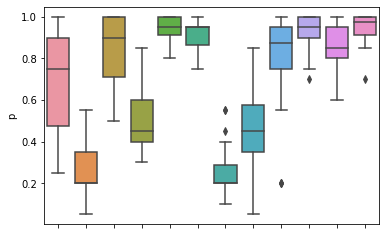

In [52]:
fig=sns.boxplot(data=df_final)
plt.ylabel('p')
fig.set(xticklabels=[])

# Fractality and avg_path_length/diam

## RBFM:

In [92]:
rbfm_avg

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n
0,1,1,0.0,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667
1,1,1,0.5,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667
2,1,1,1.0,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667
3,1,10,0.0,2.333333,2.090909,-0.784931,0.672727,0.526459,2.756451,0.970546,0.523810
4,1,10,0.5,2.673016,2.090909,-0.803615,0.604324,0.509414,2.729053,1.229359,0.504762
...,...,...,...,...,...,...,...,...,...,...,...
64,5,1,0.5,44.954584,1.991803,-0.092276,0.000000,0.616592,2.856741,24.849158,0.030041
65,5,1,1.0,44.151724,1.991803,-0.276468,0.000000,0.527132,0.783381,22.939083,0.025103
66,5,2,0.0,27.050612,2.999643,-0.070131,0.499883,0.572517,17.474211,8.980212,0.014267
67,5,2,0.5,54.291883,2.999643,-0.188689,0.555841,0.585550,6.665947,15.197007,0.006494


In [5]:
rbfm_avg['size'] = np.where(rbfm_avg['param2']==1, 2+(3**(rbfm_avg['param1'])-1), 2+((rbfm_avg['param2']/(rbfm_avg['param2']+1))*((2*rbfm_avg['param2']+3)**(rbfm_avg['param1'])-1)))

In [6]:
rbfm_avg['avgpath_size'] = rbfm_avg['avg_path_length']/rbfm_avg['size']
rbfm_avg['avgpath_logsize'] = rbfm_avg['avg_path_length']/np.log(rbfm_avg['size'])

In [7]:
rbfm_avg

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n,size,avgpath_size,avgpath_logsize
0,1,1,0.0,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667,4.0,0.416667,1.202246
1,1,1,0.5,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667,4.0,0.416667,1.202246
2,1,1,1.0,1.666667,1.500000,-0.500000,0.000000,0.601501,0.000000,2.164043,0.666667,4.0,0.416667,1.202246
3,1,10,0.0,2.333333,2.090909,-0.784931,0.672727,0.526459,2.756451,0.970546,0.523810,22.0,0.106061,0.754869
4,1,10,0.5,2.673016,2.090909,-0.803615,0.604324,0.509414,2.729053,1.229359,0.504762,22.0,0.121501,0.864762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,5,1,0.5,44.954584,1.991803,-0.092276,0.000000,0.616592,2.856741,24.849158,0.030041,244.0,0.184240,8.177771
65,5,1,1.0,44.151724,1.991803,-0.276468,0.000000,0.527132,0.783381,22.939083,0.025103,244.0,0.180950,8.031721
66,5,2,0.0,27.050612,2.999643,-0.070131,0.499883,0.572517,17.474211,8.980212,0.014267,11206.0,0.002414,2.901117
67,5,2,0.5,54.291883,2.999643,-0.188689,0.555841,0.585550,6.665947,15.197007,0.006494,11206.0,0.004845,5.822682


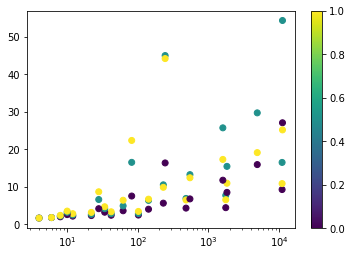

In [12]:
plt.scatter(rbfm_avg['size'], rbfm_avg['avg_path_length'], c=rbfm_avg['param3'])
plt.xscale('log')
plt.colorbar()

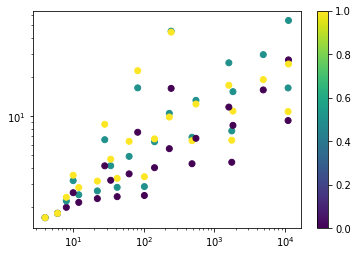

In [11]:
plt.scatter(rbfm_avg['size'], rbfm_avg['avg_path_length'], c=rbfm_avg['param3'])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

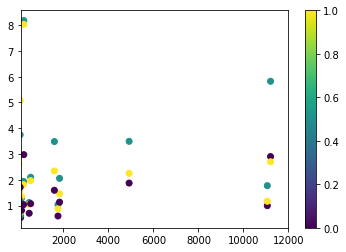

In [127]:
plt.scatter(rbfm_avg['size'], rbfm_avg['avgpath_logsize'], c=rbfm_avg['param3'])
plt.xlim(100,12000)
#plt.ylim(0,5)
plt.colorbar()

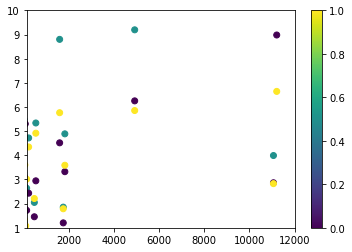

In [125]:
plt.scatter(rbfm_avg['size'], rbfm_avg['diam_logsize'], c=rbfm_avg['param3'])
plt.xlim(150,12000)
plt.ylim(1,10)
plt.colorbar()

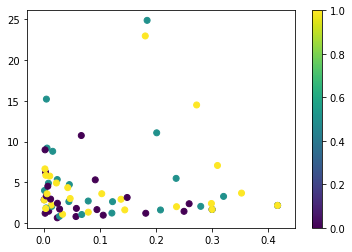

In [152]:
plt.scatter(rbfm_avg['avgpath_size'], rbfm_avg['diam_logsize'], c=rbfm_avg['param3'])
#plt.xlim(150,12000)
#plt.ylim(1,10)
plt.colorbar()

## Mixture:

In [31]:
mixture_avg['avgpath_size'] = mixture_avg['avg_path_length']/mixture_avg['V']
mixture_avg['avgpath_logsize'] = mixture_avg['avg_path_length']/np.log(mixture_avg['V'])

In [39]:
mixture_avg_smallp = mixture_avg[mixture_avg['param3']<=0.05]

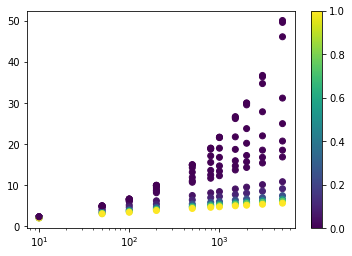

In [32]:
plt.scatter(mixture_avg['V'],mixture_avg['avg_path_length'],c=mixture_avg['param3'])
plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

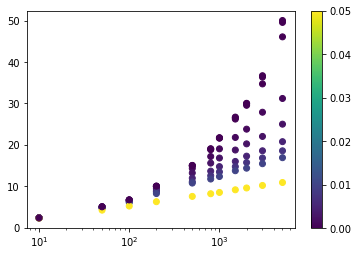

In [40]:
plt.scatter(mixture_avg_smallp['V'],mixture_avg_smallp['avg_path_length'],c=mixture_avg_smallp['param3'])
plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

In [45]:
mixture_avg_smallp.head(10)

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n,V,avgpath_size,avgpath_logsize
0,10,10,0.00000,6.666667,3.6,0.570611,0.000000,0.178136,-1.060660,3.908650,0.040404,100,0.066667,1.447648
1,10,10,0.00010,6.653495,3.6,0.570599,0.000000,0.179567,-1.053552,3.908650,0.040741,100,0.066535,1.444788
2,10,10,0.00100,6.639919,3.6,0.568197,0.000000,0.179506,-1.047527,3.886936,0.040741,100,0.066399,1.441840
3,10,10,0.00250,6.514963,3.6,0.549019,0.000422,0.182937,-1.023751,3.800077,0.043434,100,0.065150,1.414706
4,10,10,0.00500,6.319825,3.6,0.530392,0.000000,0.185673,-0.991576,3.633597,0.045455,100,0.063198,1.372333
5,10,10,0.00750,6.293576,3.6,0.515656,0.001011,0.182643,-0.964177,3.604644,0.045118,100,0.062936,1.366633
6,10,10,0.01000,6.034949,3.6,0.484637,0.000578,0.190572,-0.849509,3.293400,0.048485,100,0.060349,1.310473
7,10,10,0.05000,5.186108,3.6,0.307949,0.002707,0.202311,-0.388711,2.555099,0.052862,100,0.051861,1.126149
13,10,10,0.00001,6.666667,3.6,0.570611,0.000000,0.178136,-1.060660,3.908650,0.040404,100,0.066667,1.447648
14,10,20,0.00000,10.000000,3.7,0.594654,0.000000,0.129887,-1.344000,5.284697,0.020101,200,0.050000,1.887392


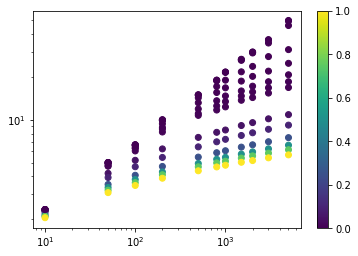

In [33]:
plt.scatter(mixture_avg['V'],mixture_avg['avg_path_length'],c=mixture_avg['param3'])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

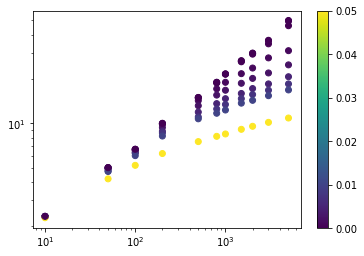

In [41]:
plt.scatter(mixture_avg_smallp['V'],mixture_avg_smallp['avg_path_length'],c=mixture_avg_smallp['param3'])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

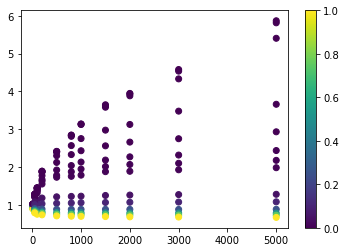

In [34]:
plt.scatter(mixture_avg['V'],mixture_avg['avgpath_logsize'], c=mixture_avg['param3'], marker="o", label='mixture')
#plt.xlim(200,6000)
#plt.ylim(0,3)
plt.colorbar()

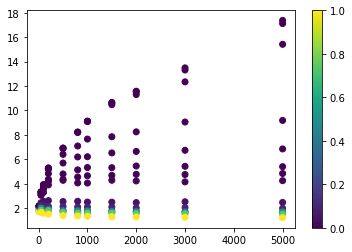

In [42]:
plt.scatter(mixture_avg['V'],mixture_avg['diam_logsize'], c=mixture_avg['param3'], marker="o", label='mixture')
#plt.xlim(200,6000)
#plt.ylim(1,5)
plt.colorbar()

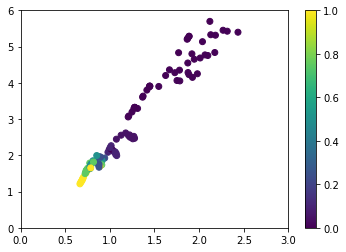

In [43]:
plt.scatter(mixture_avg['avgpath_logsize'],mixture_avg['diam_logsize'], c=mixture_avg['param3'])
plt.xlim(0,3)
plt.ylim(0,6)
plt.colorbar()

## SHM:

In [20]:
shm_avg['size'] = 2+((2*shm_avg['param2']+1)**(shm_avg['param1'])-1)

In [96]:
shm_avg['avgpath_size'] = shm_avg['avg_path_length']/shm_avg['size']
shm_avg['avgpath_logsize'] = shm_avg['avg_path_length']/np.log(shm_avg['size'])

In [97]:
shm_avg

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n,size,avgpath_size,avgpath_logsize
0,1,1,0.0,1.666667,1.50000,-0.500000,0,0.601501,0.000000,2.164043,0.666667,4,0.416667,1.202246
1,1,1,0.2,1.666667,1.50000,-0.500000,0,0.601501,0.000000,2.164043,0.666667,4,0.416667,1.202246
2,1,1,0.4,1.666667,1.50000,-0.500000,0,0.601501,0.000000,2.164043,0.666667,4,0.416667,1.202246
3,1,1,0.6,1.666667,1.50000,-0.500000,0,0.601501,0.000000,2.164043,0.666667,4,0.416667,1.202246
4,1,1,0.8,1.666667,1.50000,-0.500000,0,0.601501,0.000000,2.164043,0.666667,4,0.416667,1.202246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,5,2,0.2,11.645959,1.99936,-0.129749,0,0.657486,22.581511,4.721958,0.058240,3126,0.003726,1.447151
134,5,2,0.4,23.192186,1.99936,-0.125233,0,0.696691,18.720147,9.149829,0.042080,3126,0.007419,2.881909
135,5,2,0.6,45.622480,1.99936,-0.124280,0,0.702090,15.604771,18.022139,0.029739,3126,0.014595,5.669143
136,5,2,0.8,88.651994,1.99936,-0.144870,0,0.701945,11.360967,34.370882,0.018283,3126,0.028360,11.016078


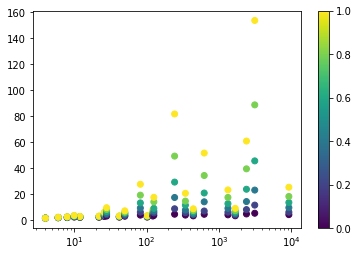

In [98]:
plt.scatter(shm_avg['size'],shm_avg['avg_path_length'],c=shm_avg['param3'])
plt.xscale('log')
plt.colorbar()

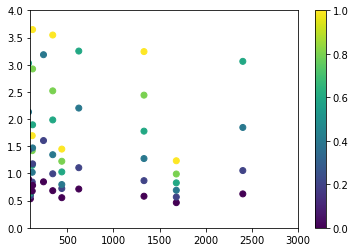

In [119]:
plt.scatter(shm_avg['size'], shm_avg['avgpath_logsize'], c=shm_avg['param3'])
plt.xlim(100,3000)
plt.ylim(0,4)
plt.colorbar()

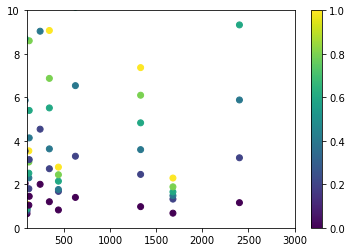

In [85]:
plt.scatter(shm_avg['size'], shm_avg['diam_logsize'], c=shm_avg['param3'])
plt.xlim(100,3000)
plt.ylim(0,10)
plt.colorbar()

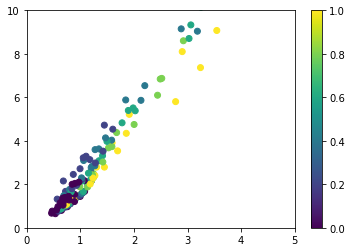

In [147]:
plt.scatter(shm_avg['avgpath_logsize'], shm_avg['diam_logsize'], c=shm_avg['param3'])
plt.xlim(0,5)
plt.ylim(0,10)
plt.colorbar()

## (u,v)-flower:

In [65]:
uvflower_metrics

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n
0,1,1,1,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000
1,1,1,2,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000
2,1,1,3,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000
3,1,1,4,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000
4,1,1,5,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
112,4,6,3,45.185223,2.247191,-0.177536,0.0,0.206419,4.428010,13.252402,0.008999
113,4,6,4,181.076476,2.249719,-0.131075,0.0,0.222200,6.605606,39.812234,0.001800
114,5,5,1,2.777778,2.000000,NaN,0.0,0.316228,NaN,2.171472,0.222222
115,5,5,2,12.740325,2.222222,-0.250000,0.0,0.177663,2.474874,5.555791,0.044944


In [66]:
uvflower_metrics['size'] = (((uvflower_metrics['param1']+uvflower_metrics['param2'])**(uvflower_metrics['param3'])*
                            ((uvflower_metrics['param1']+uvflower_metrics['param2']-2)/(uvflower_metrics['param1']+uvflower_metrics['param2']-1)))+
                           (uvflower_metrics['param1']+uvflower_metrics['param2'])/(uvflower_metrics['param1']+uvflower_metrics['param2']-1))

In [104]:
uvflower_metrics['avgpath_size'] = uvflower_metrics['avg_path_length']/uvflower_metrics['size']
uvflower_metrics['avgpath_logsize'] = uvflower_metrics['avg_path_length']/np.log(uvflower_metrics['size'])

In [105]:
uvflower_metrics

,param1,param2,param3,avg_path_length,avg_deg,assortativity,avg_clust,max_eigen,skew_deg_dist,diam_logsize,max_deg_n,size,avgpath_size,avgpath_logsize
0,1,1,1,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000,2.0,0.500000,1.442695
1,1,1,2,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000,2.0,0.500000,1.442695
2,1,1,3,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000,2.0,0.500000,1.442695
3,1,1,4,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000,2.0,0.500000,1.442695
4,1,1,5,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.442695,1.000000,2.0,0.500000,1.442695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,4,6,3,45.185223,2.247191,-0.177536,0.0,0.206419,4.428010,13.252402,0.008999,890.0,0.050770,6.653475
113,4,6,4,181.076476,2.249719,-0.131075,0.0,0.222200,6.605606,39.812234,0.001800,8890.0,0.020369,19.914528
114,5,5,1,2.777778,2.000000,NaN,0.0,0.316228,NaN,2.171472,0.222222,10.0,0.277778,1.206374
115,5,5,2,12.740325,2.222222,-0.250000,0.0,0.177663,2.474874,5.555791,0.044944,90.0,0.141559,2.831303


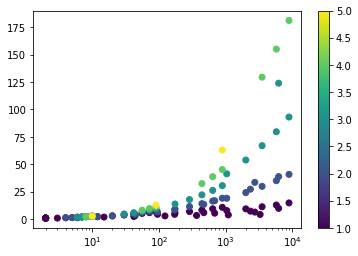

In [106]:
plt.scatter(uvflower_metrics['size'],uvflower_metrics['avg_path_length'],c=uvflower_metrics['param1'])
plt.xscale('log')
plt.colorbar()

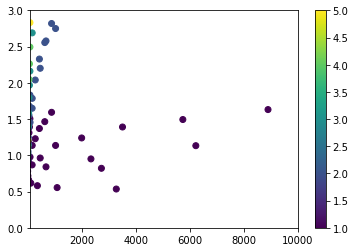

In [121]:
plt.scatter(uvflower_metrics['size'], uvflower_metrics['avgpath_logsize'], c=uvflower_metrics['param1'])
plt.xlim(100,10000)
plt.ylim(0,3)
plt.colorbar()

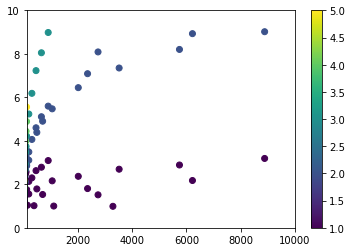

In [82]:
plt.scatter(uvflower_metrics['size'], uvflower_metrics['diam_logsize'], c=uvflower_metrics['param1'])
plt.xlim(100,10000)
plt.ylim(0,10)
plt.colorbar()

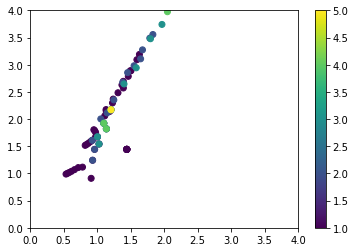

In [144]:
plt.scatter(uvflower_metrics['avgpath_logsize'], uvflower_metrics['diam_logsize'], c=uvflower_metrics['param1'])
plt.xlim(0,4)
plt.ylim(0,4)
plt.colorbar()